In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample lesson plans and user profile (mock data)
lesson_plans = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'title': ['Introduction to Algebra', 'Advanced Geometry', 'Basics of Chemistry', 'Introduction to Physics'],
    'content': [
        'Learn the fundamentals of algebra including equations and functions.',
        'Explore complex geometrical shapes and theorems.',
        'Understand the basics of chemical reactions and elements.',
        'Study the principles of physics including force and motion.'
    ]
})

user_profile = "I am interested in basic science subjects and fundamental algebra."

# Vectorize the lesson content and user profile
vectorizer = TfidfVectorizer()
lesson_vectors = vectorizer.fit_transform(lesson_plans['content'])
user_vector = vectorizer.transform([user_profile])

# Compute cosine similarity between user profile and lesson plans
similarity_scores = cosine_similarity(user_vector, lesson_vectors).flatten()

# Recommend the most similar lesson plans
recommendations = lesson_plans.iloc[np.argsort(-similarity_scores)]
print("Recommended Lesson Plans:")
print(recommendations[['title', 'content']])


Recommended Lesson Plans:
                     title                                            content
0  Introduction to Algebra  Learn the fundamentals of algebra including eq...
1        Advanced Geometry   Explore complex geometrical shapes and theorems.
2      Basics of Chemistry  Understand the basics of chemical reactions an...
3  Introduction to Physics  Study the principles of physics including forc...


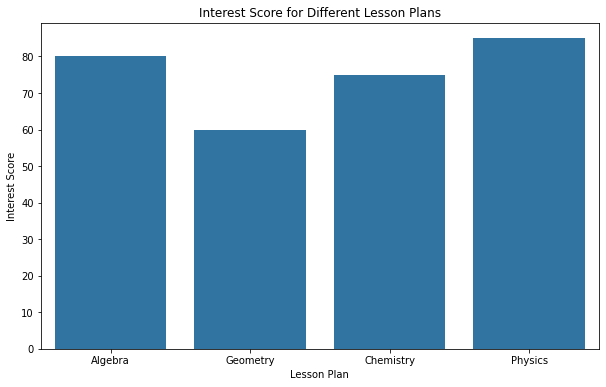

In [2]:
#Exploratory data Analysis(EDA)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (mock data for demonstration)
data = pd.DataFrame({
    'Lesson Plan': ['Algebra', 'Geometry', 'Chemistry', 'Physics'],
    'Interest Score': [80, 60, 75, 85]
})

# Basic bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Lesson Plan', y='Interest Score', data=data)
plt.title('Interest Score for Different Lesson Plans')
plt.xlabel('Lesson Plan')
plt.ylabel('Interest Score')
plt.show()


In [4]:
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Lesson Plan': ['Algebra', 'Geometry', 'Chemistry', 'Physics'],
    'Content Length': [150, 200, 180, 160]
})

# Summary statistics
print("Summary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Summary Statistics:
       Content Length
count        4.000000
mean       172.500000
std         22.173558
min        150.000000
25%        157.500000
50%        170.000000
75%        185.000000
max        200.000000

Missing Values:
Lesson Plan       0
Content Length    0
dtype: int64


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Sample data
d = pd.DataFrame({
    'Text': ['Learn algebra basics', 'Advanced geometry concepts', 'Basics of chemistry', 'Introduction to physics'],
    'Category': [0, 1, 0, 1]  # 0: Science, 1: Advanced
})

# Feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(d['Text'])
y = d['Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation
score = model.score(X_test, y_test)
print(f"Model Accuracy: {score:.2f}")


Model Accuracy: 0.50


In [6]:
from sklearn.metrics import confusion_matrix, classification_report

# Model evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\91897\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91897\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91897\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

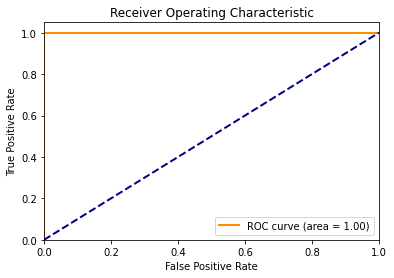

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
